In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util.calibration_misc import write_peak_file,data_prep
from util.config import Config
import time
import h5py

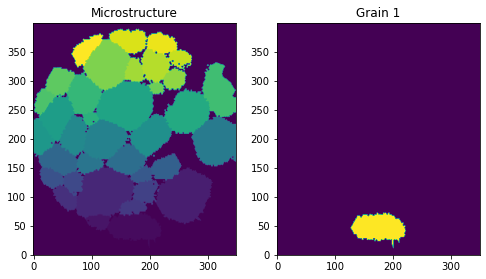

thresholding
removing hot spots
smoothing
total peaks: 104
peaks within cutoff distance: 71


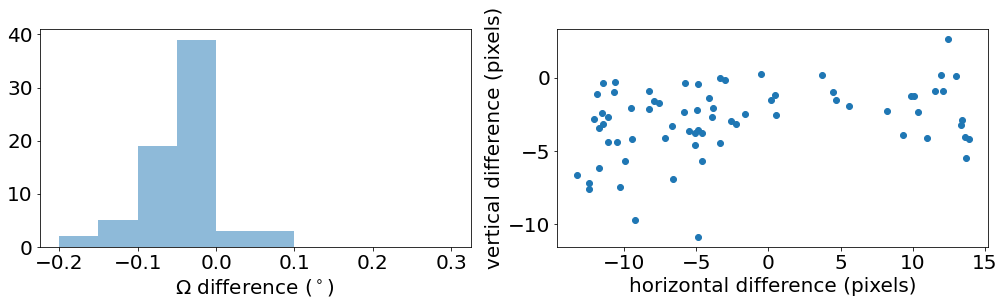

68.0 seconds


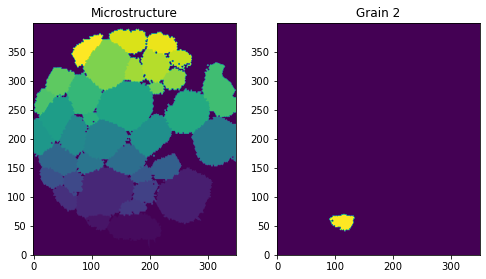

thresholding
removing hot spots
smoothing
total peaks: 109
peaks within cutoff distance: 95


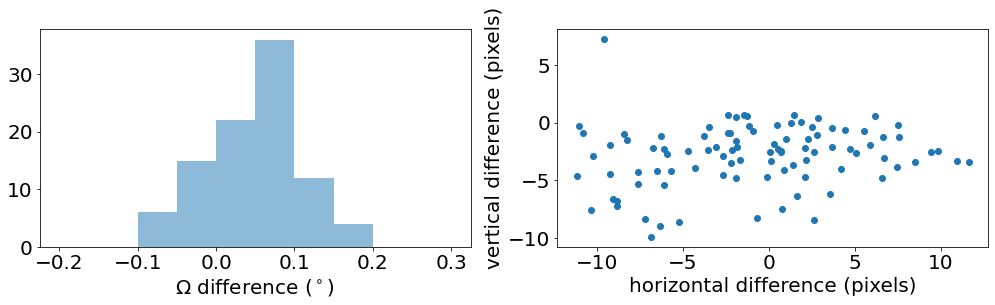

71.0 seconds


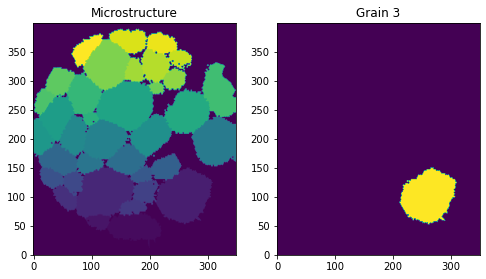

thresholding
removing hot spots
smoothing
total peaks: 111
peaks within cutoff distance: 73


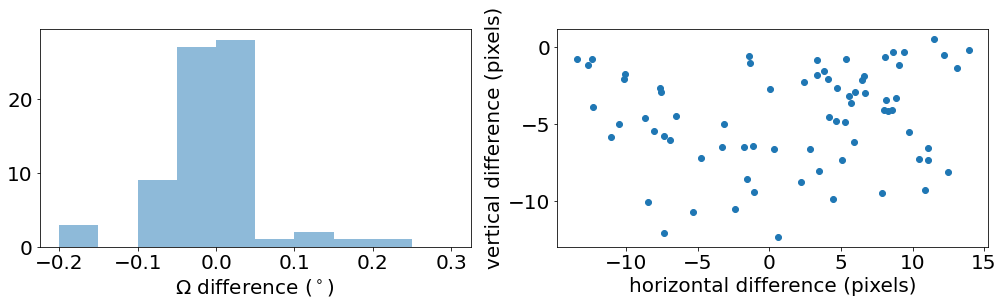

70.0 seconds


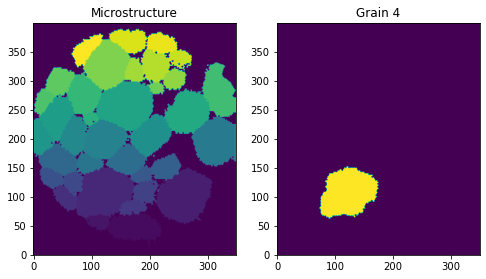

thresholding
removing hot spots
smoothing
total peaks: 107
peaks within cutoff distance: 66


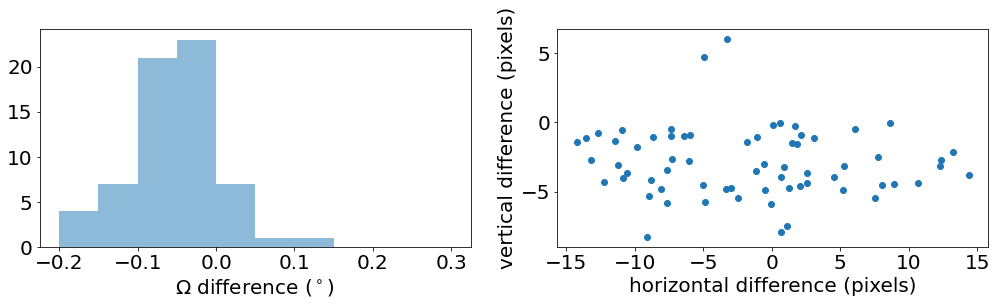

68.0 seconds


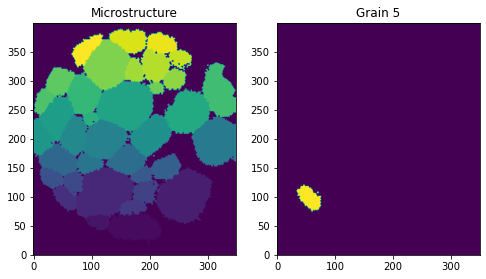

thresholding
removing hot spots
smoothing
total peaks: 104
peaks within cutoff distance: 91


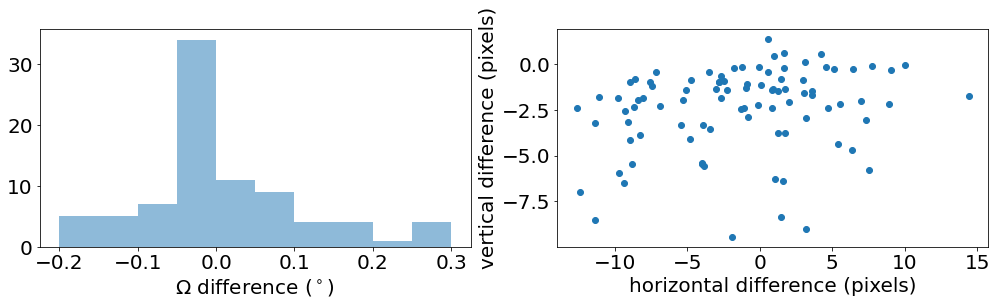

66.0 seconds


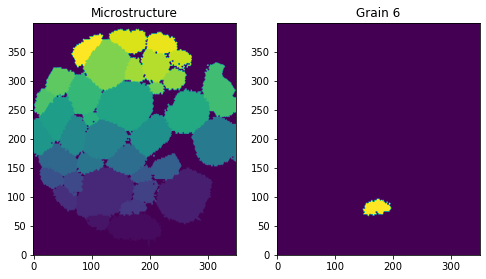

thresholding
removing hot spots
smoothing
total peaks: 117
peaks within cutoff distance: 97


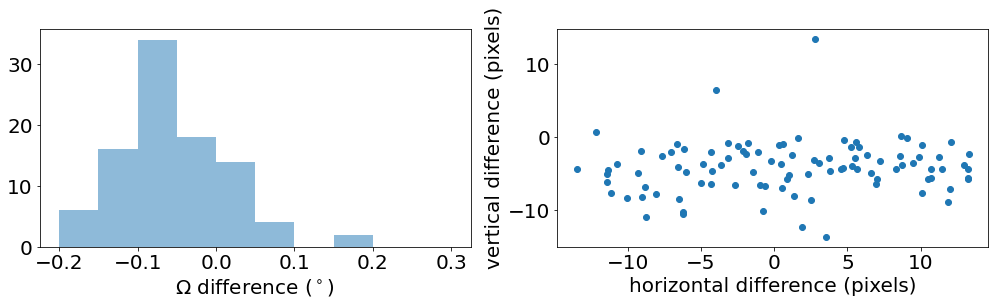

75.0 seconds


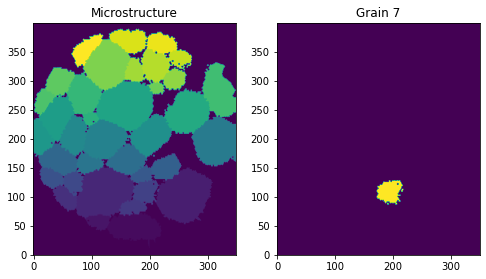

thresholding
removing hot spots
smoothing
total peaks: 109
peaks within cutoff distance: 90


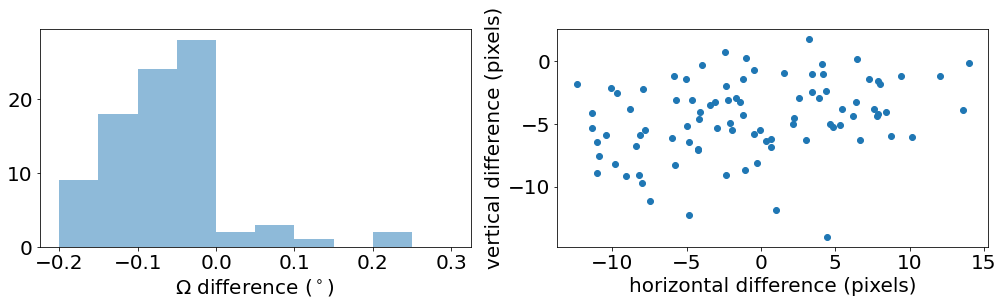

70.0 seconds


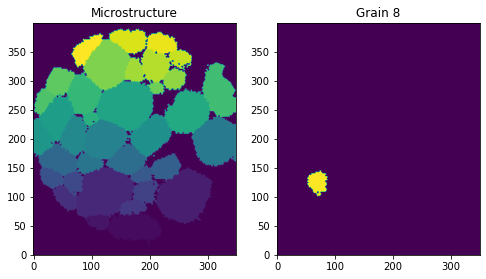

thresholding
removing hot spots
smoothing
total peaks: 102
peaks within cutoff distance: 88


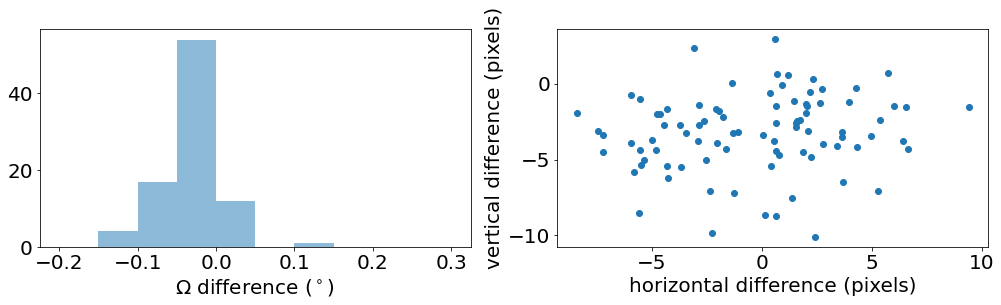

65.0 seconds


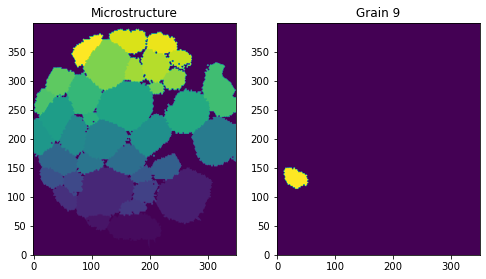

thresholding
removing hot spots
smoothing
total peaks: 101
peaks within cutoff distance: 89


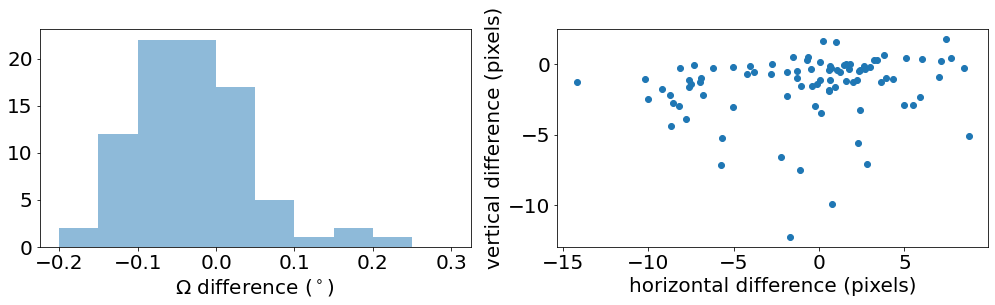

64.0 seconds


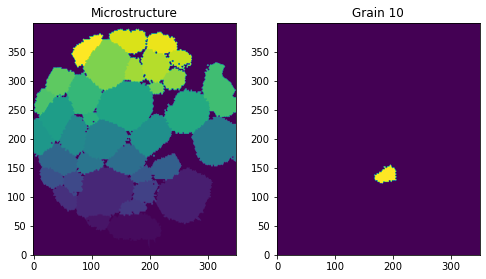

thresholding
removing hot spots
smoothing
total peaks: 101
peaks within cutoff distance: 82


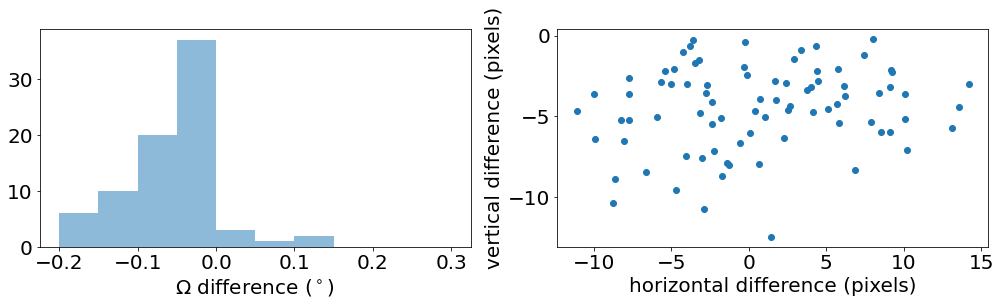

65.0 seconds


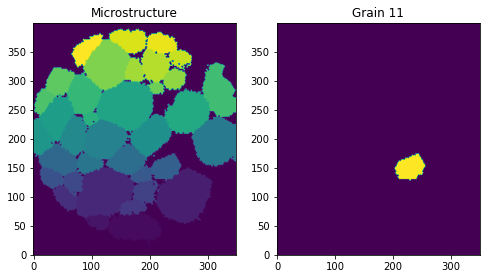

thresholding
removing hot spots
smoothing
total peaks: 109
peaks within cutoff distance: 86


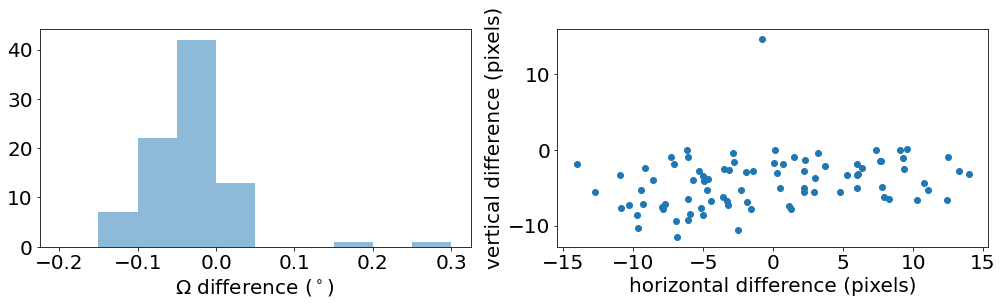

70.0 seconds


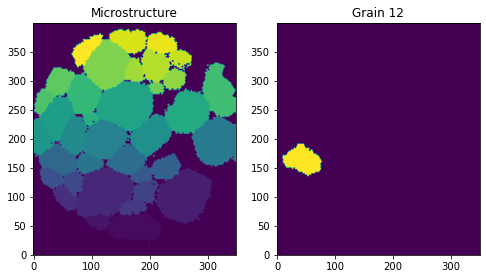

thresholding
removing hot spots
smoothing
total peaks: 101
peaks within cutoff distance: 88


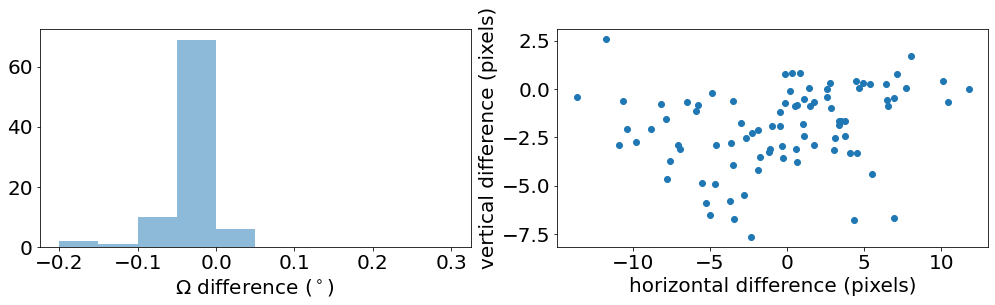

63.0 seconds


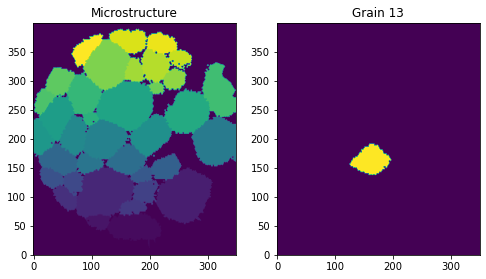

thresholding
removing hot spots
smoothing
total peaks: 95
peaks within cutoff distance: 88


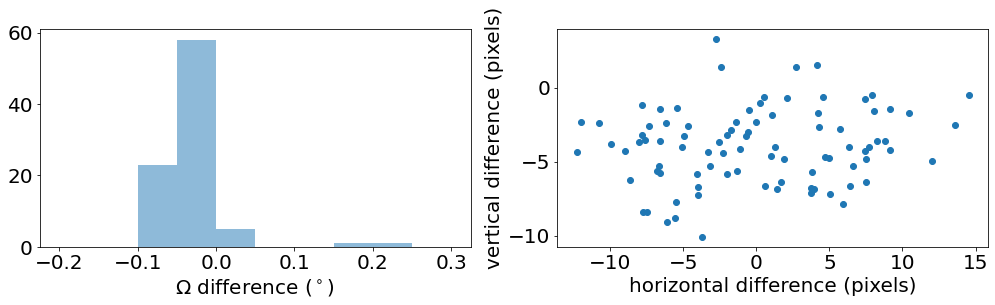

61.0 seconds


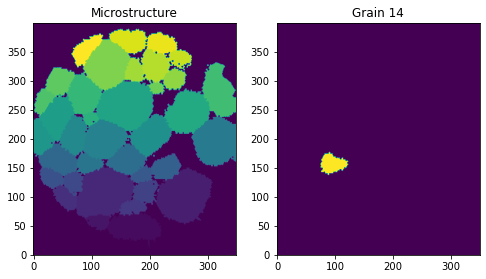

thresholding
removing hot spots
smoothing
total peaks: 105
peaks within cutoff distance: 94


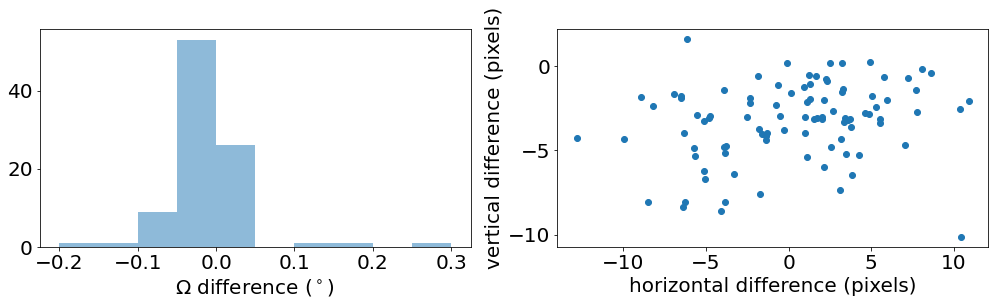

68.0 seconds


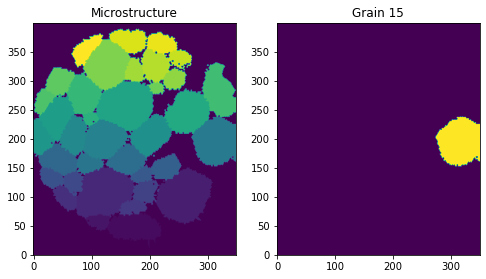

thresholding
removing hot spots
smoothing
total peaks: 110
peaks within cutoff distance: 64


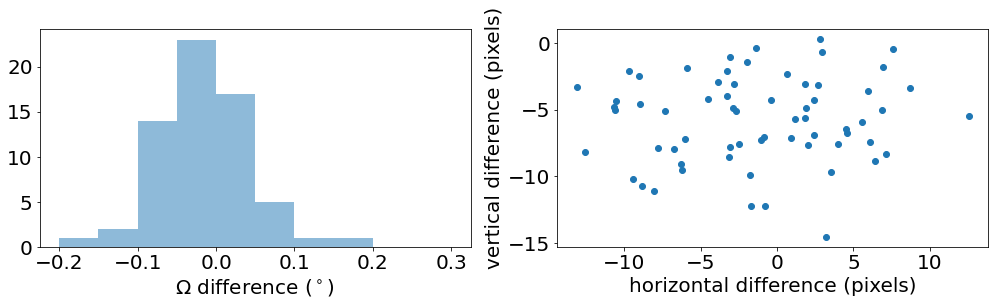

71.0 seconds


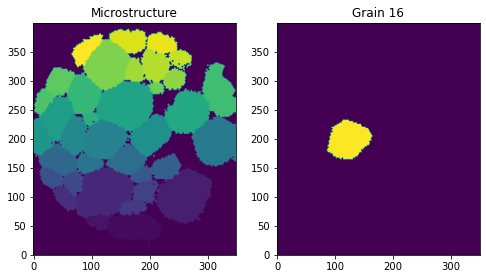

thresholding
removing hot spots
smoothing
total peaks: 103
peaks within cutoff distance: 83


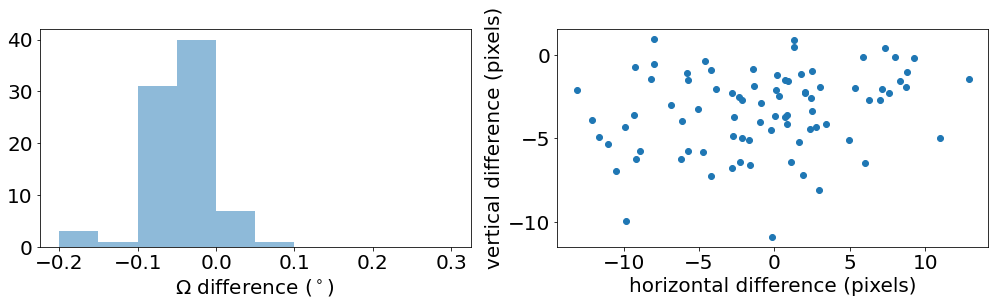

66.0 seconds


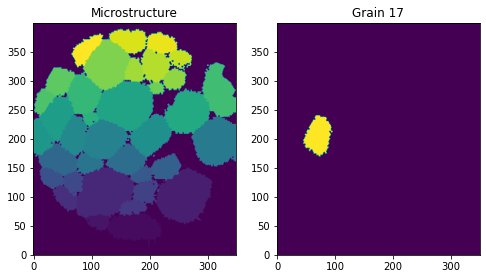

thresholding
removing hot spots
smoothing
total peaks: 97
peaks within cutoff distance: 86


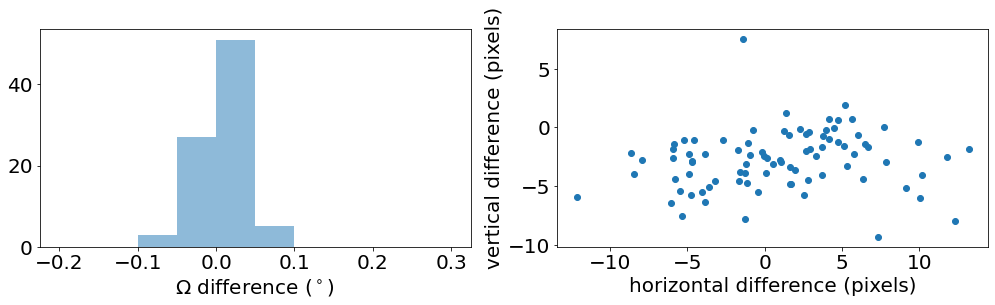

62.0 seconds


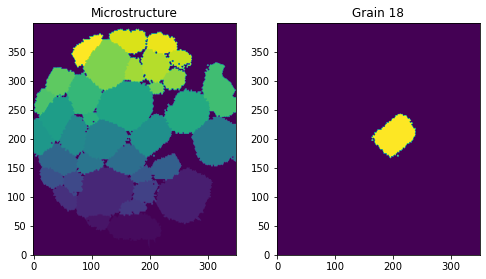

thresholding
removing hot spots
smoothing
total peaks: 100
peaks within cutoff distance: 73


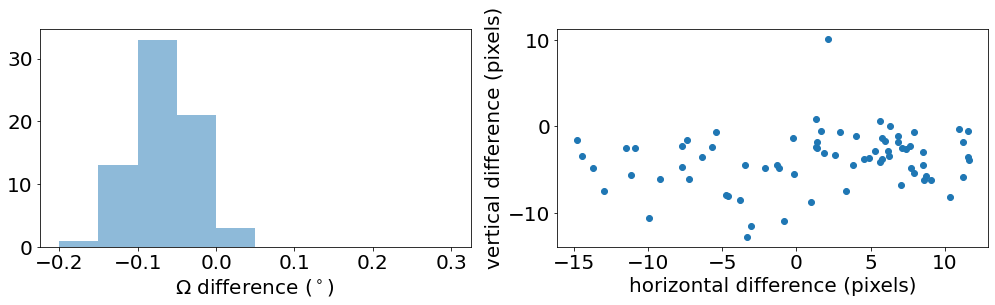

64.0 seconds


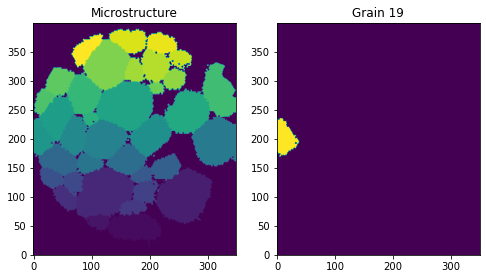

thresholding
removing hot spots
smoothing
total peaks: 107
peaks within cutoff distance: 97


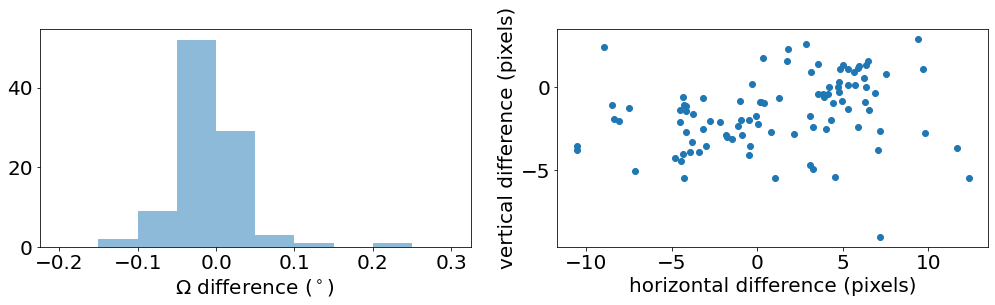

70.0 seconds


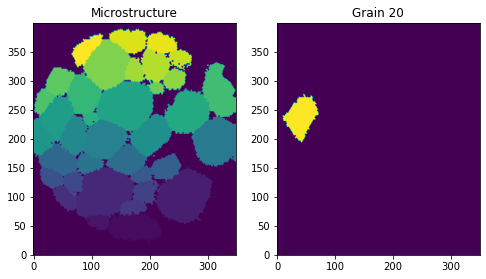

thresholding
removing hot spots
smoothing
total peaks: 98
peaks within cutoff distance: 77


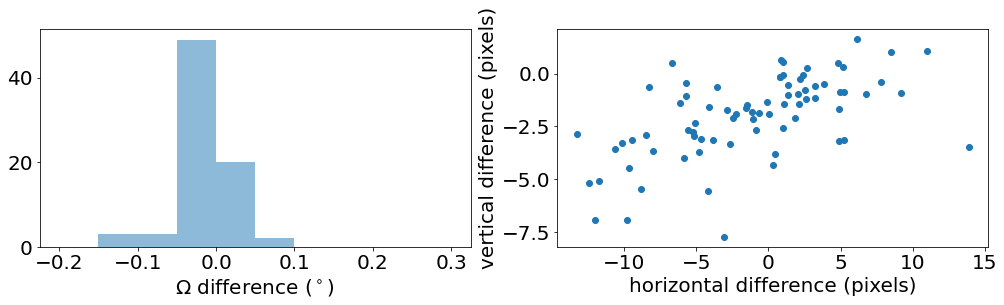

63.0 seconds


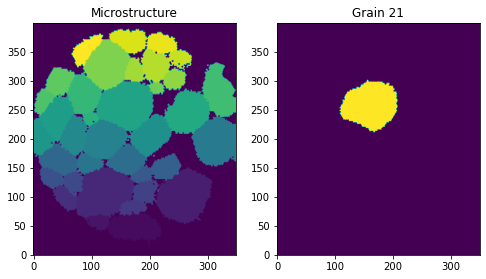

thresholding
removing hot spots
smoothing
total peaks: 92
peaks within cutoff distance: 56


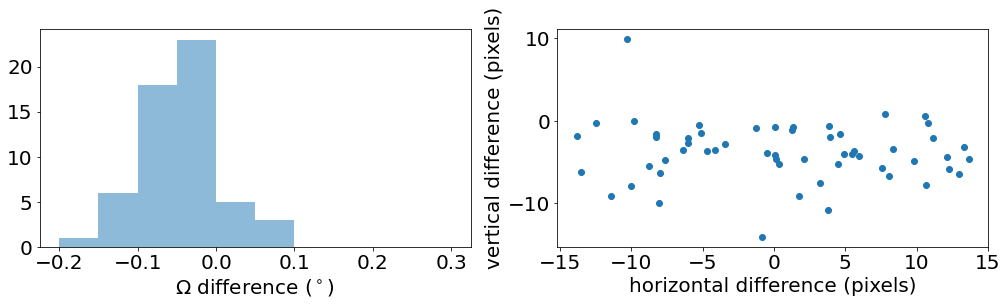

59.0 seconds


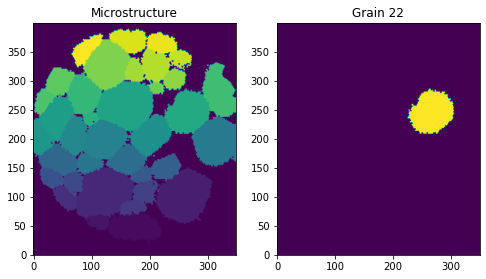

thresholding
removing hot spots
smoothing
total peaks: 103
peaks within cutoff distance: 53


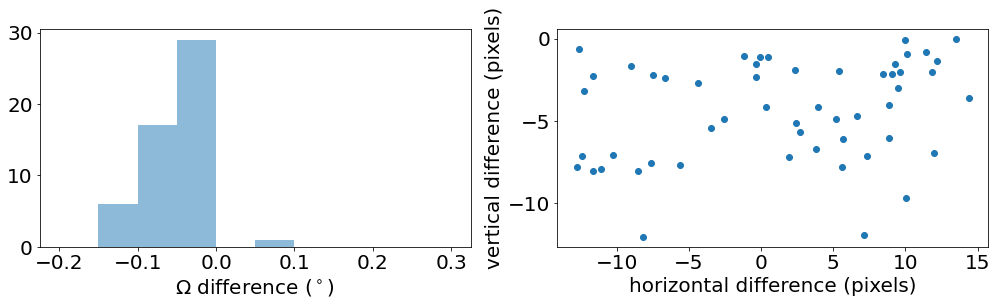

66.0 seconds


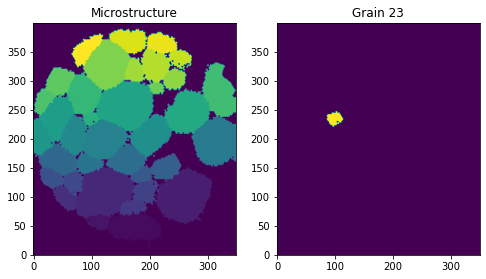

thresholding
removing hot spots
smoothing
total peaks: 102
peaks within cutoff distance: 84


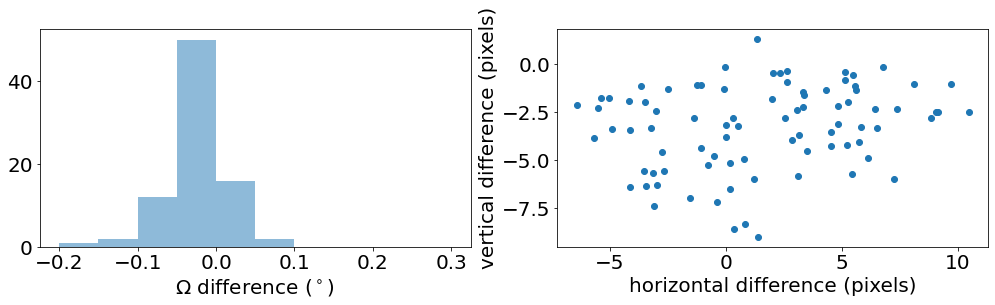

66.0 seconds


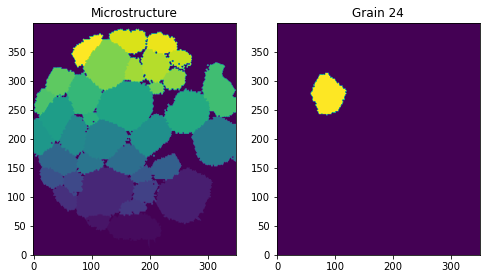

thresholding
removing hot spots
smoothing
total peaks: 95
peaks within cutoff distance: 84


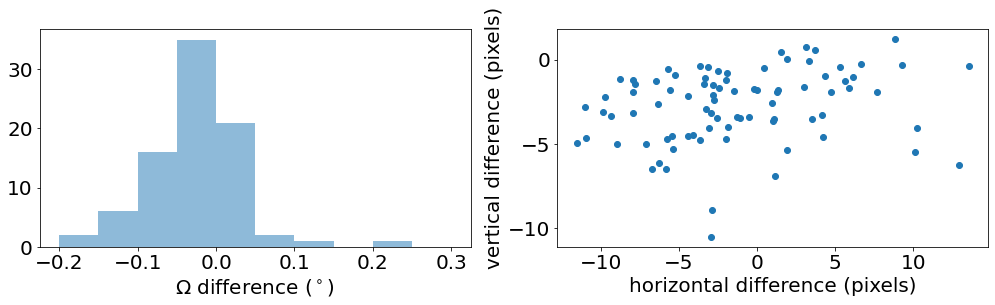

62.0 seconds


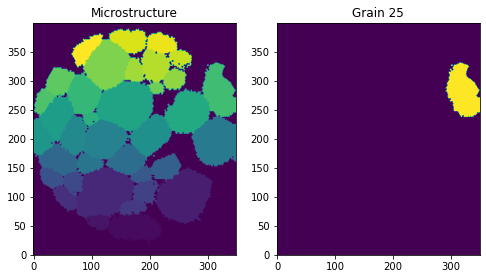

thresholding
removing hot spots
smoothing
total peaks: 97
peaks within cutoff distance: 66


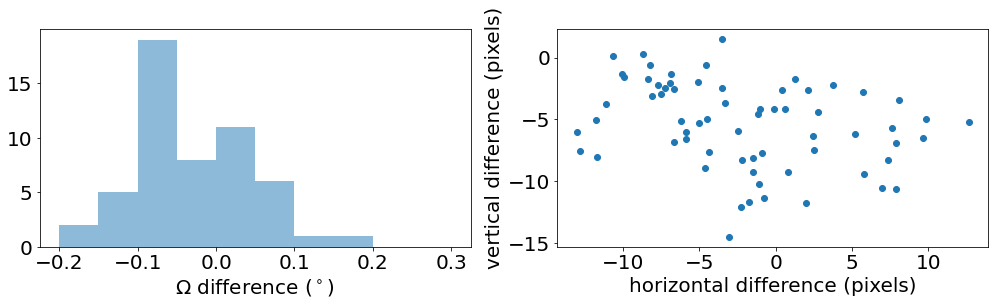

63.0 seconds


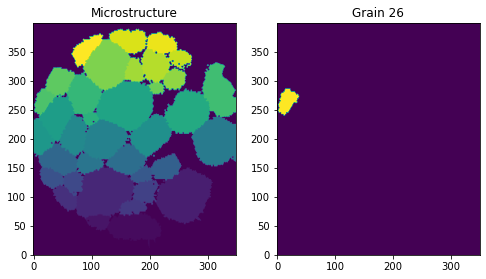

thresholding
removing hot spots
smoothing
total peaks: 94
peaks within cutoff distance: 79


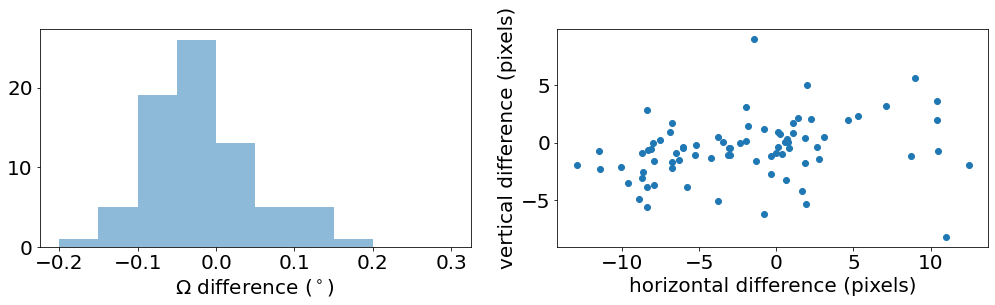

60.0 seconds


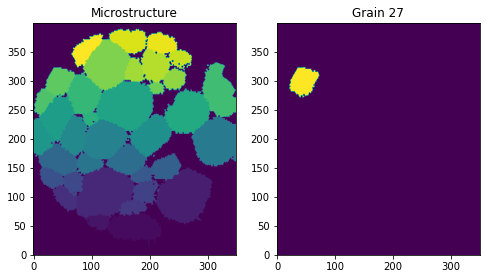

thresholding
removing hot spots
smoothing
total peaks: 98
peaks within cutoff distance: 87


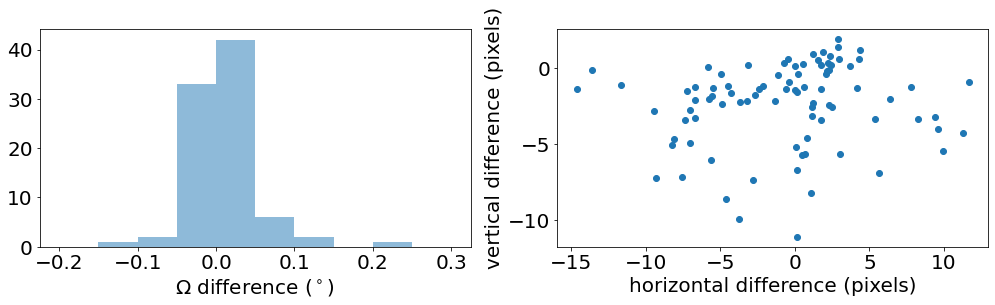

63.0 seconds


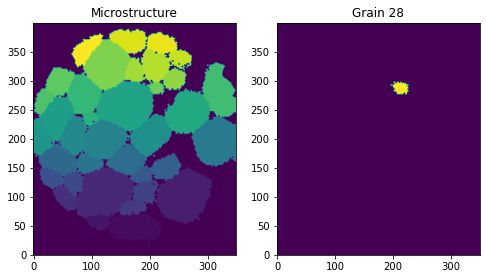

thresholding
removing hot spots
smoothing
total peaks: 90
peaks within cutoff distance: 78


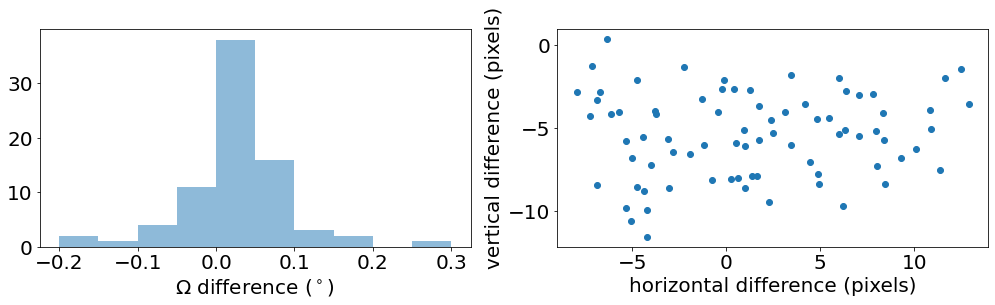

58.0 seconds


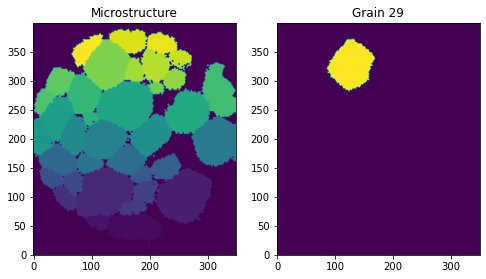

thresholding
removing hot spots
smoothing
total peaks: 96
peaks within cutoff distance: 67


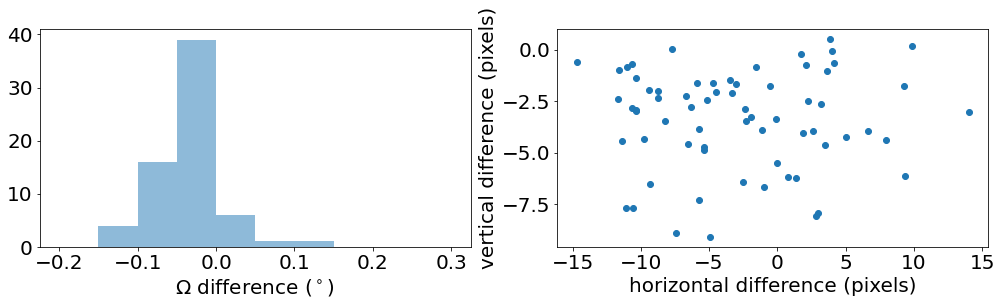

62.0 seconds


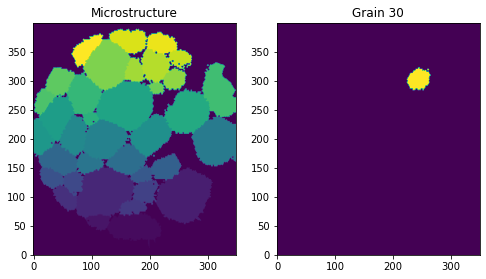

thresholding
removing hot spots
smoothing
total peaks: 100
peaks within cutoff distance: 77


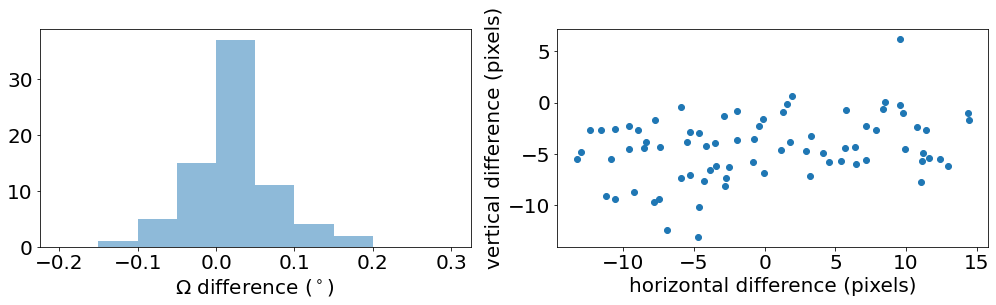

65.0 seconds


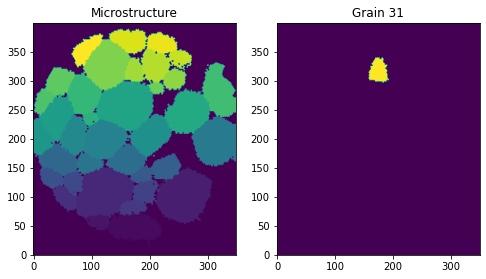

thresholding
removing hot spots
smoothing
total peaks: 90
peaks within cutoff distance: 80


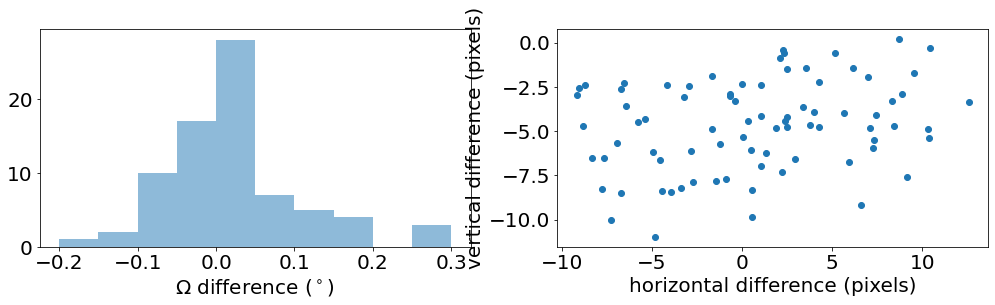

58.0 seconds


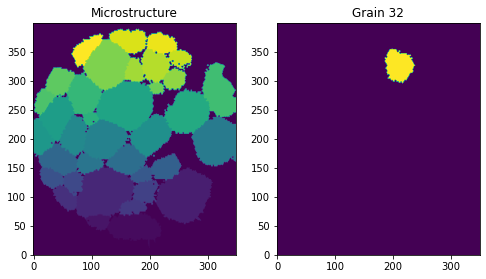

thresholding
removing hot spots
smoothing
total peaks: 95
peaks within cutoff distance: 83


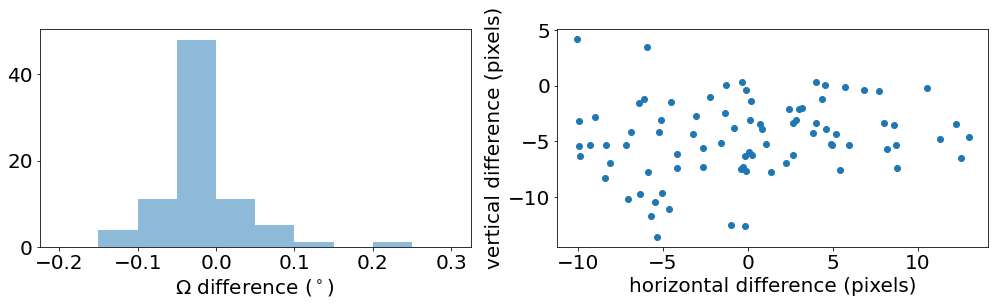

62.0 seconds


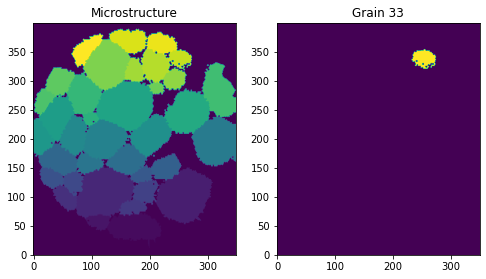

thresholding
removing hot spots
smoothing
total peaks: 94
peaks within cutoff distance: 76


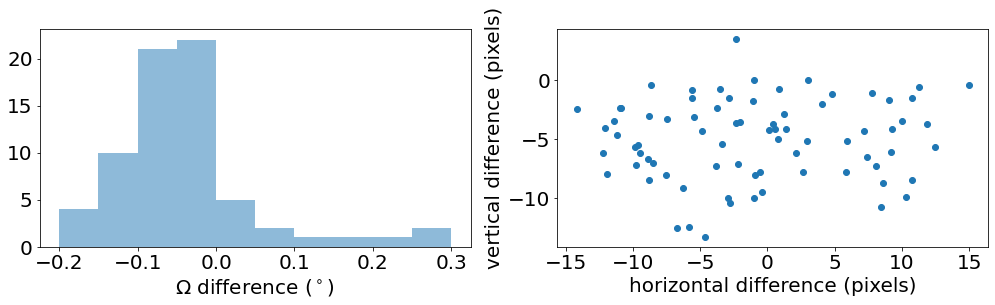

61.0 seconds


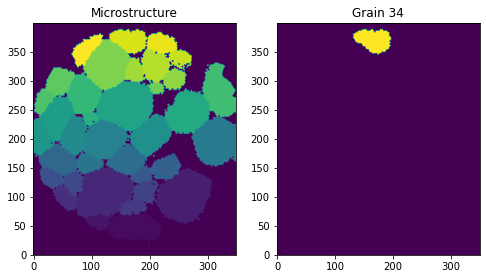

thresholding
removing hot spots
smoothing
total peaks: 96
peaks within cutoff distance: 85


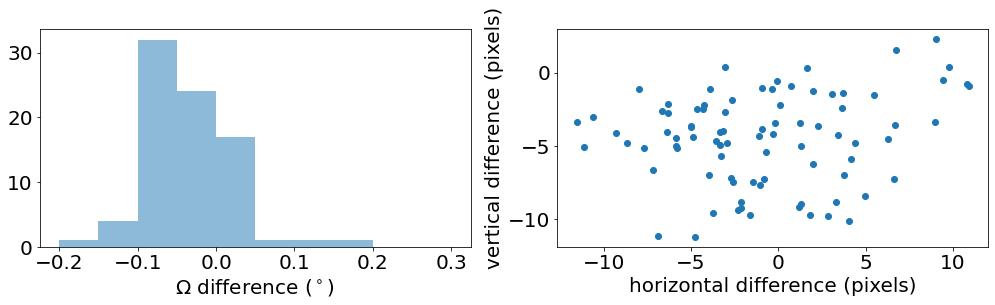

63.0 seconds


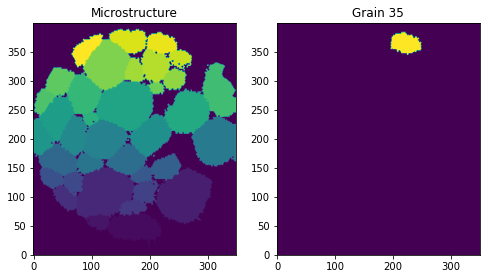

thresholding
removing hot spots
smoothing
total peaks: 95
peaks within cutoff distance: 80


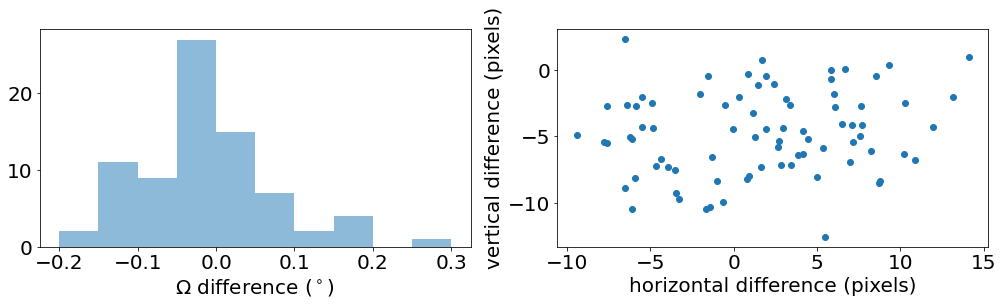

62.0 seconds


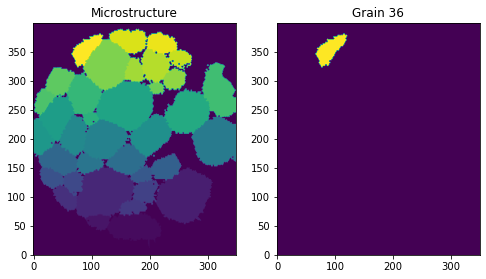

thresholding
removing hot spots
smoothing
total peaks: 99
peaks within cutoff distance: 86


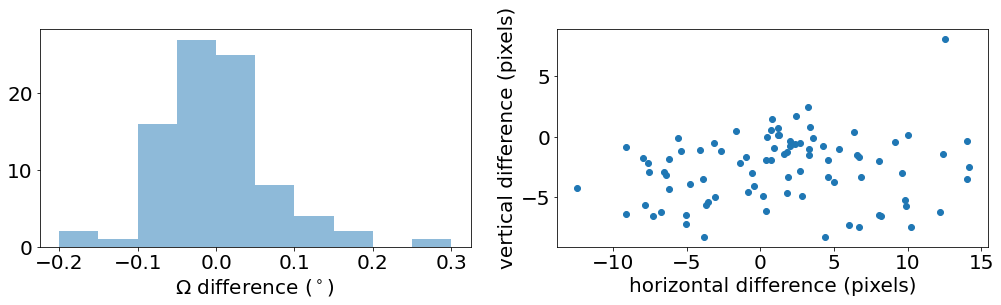

63.0 seconds


In [2]:
# prep data and write hdf5 peak files for all grains using the new calibrated detector positions
#########################################################################
cutoff = 15 #pixels
Cfg = Config('Config_Files/Config.yml')
#################################################################################

for g in range(1,37):
    start = time.time()
    grain = Config(f'Config_Files/Grain_Files/Grain_%03d.yml'%g)
    #show grain
    microstructure = np.array(h5py.File(grain.micFile,'r')['GrainID'])
    chosen_grain = np.where(microstructure==g,1,0)
    
    fig,ax = plt.subplots(ncols=2,figsize=(7,4))
    ax[0].imshow(microstructure,origin='lower')
    ax[1].imshow(chosen_grain,origin='lower')
    ax[1].set_title('Grain %s'%g)
    ax[0].set_title('Microstructure')
    plt.show()
    
    # prep data and write peakfile
    
    path = 'Peak_Files/'
    centers_of_mass = data_prep(Cfg,grain,path)
    write_peak_file(Cfg,grain,centers_of_mass,path,cutoff)
    
    print(np.round(time.time()-start),'seconds')